# MNIST Classification Example

Let's walk through a complete example using MicroKeras to classify handwritten digits from the MNIST dataset. This example will demonstrate how to load data, create a model, train it, make predictions, and save/load the model.

### Importing Dependencies

First, let's install and import the necessary modules:

*Note: You might need to restart your Google Colab Session after installing microkeras.*


In [ ]:
!pip install microkeras

In [ ]:
import numpy as np
from microkeras.models import Sequential
from microkeras.layers import Dense
from microkeras.optimizers import SGD
from microkeras.datasets import mnist

### Loading and Preprocessing Data

Next, we'll load the MNIST dataset and preprocess it:

In [3]:
# Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# One-hot encode the labels
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

print("Data shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Data shapes:
X_train: (56000, 784), y_train: (56000, 10)
X_test: (14000, 784), y_test: (14000, 10)


### Creating the Model

Now, let's create our Sequential model:


In [4]:
model = Sequential([
    Dense(200, activation='sigmoid', input_shape=(784,)),
    Dense(200, activation='sigmoid'),
    Dense(10, activation='softmax')
])

This model consists of two hidden layers with sigmoid activation and an output layer with softmax activation, suitable for multi-class classification.



### Compiling the Model

We'll compile the model using Stochastic Gradient Descent (SGD) as the optimizer and Categorical Cross-Entropy as the loss function:

In [5]:
optimizer = SGD(learning_rate=0.1)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the Model

Let's train the model for 10 epochs with a batch size of 32:


In [6]:
history = model.fit(X_train,
                    y_train,
                    batch_size=16,
                    epochs=10)

Epoch 1/10


Batch 3500/3500 - Loss: 5.0194, Acc: 0.9062: : 3712it [00:42, 86.48it/s] 


Epoch 2/10


Batch 3500/3500 - Loss: 1.4785, Acc: 0.9824: : 3712it [00:21, 172.67it/s]


Epoch 3/10


Batch 3500/3500 - Loss: 1.3456, Acc: 0.9824: : 3712it [00:23, 161.27it/s]


Epoch 4/10


Batch 3500/3500 - Loss: 1.0620, Acc: 0.9902: : 3712it [00:36, 101.68it/s]


Epoch 5/10


Batch 3500/3500 - Loss: 0.8673, Acc: 0.9922: : 3712it [00:22, 166.20it/s]


Epoch 6/10


Batch 3500/3500 - Loss: 0.7536, Acc: 0.9941: : 3712it [00:23, 160.07it/s]


Epoch 7/10


Batch 3500/3500 - Loss: 0.4995, Acc: 0.9941: : 3712it [00:22, 164.22it/s]


Epoch 8/10


Batch 3500/3500 - Loss: 0.3545, Acc: 0.9980: : 3712it [00:22, 164.42it/s]


Epoch 9/10


Batch 3500/3500 - Loss: 0.5201, Acc: 0.9961: : 3712it [00:23, 160.70it/s]


Epoch 10/10


Batch 3500/3500 - Loss: 0.3332, Acc: 0.9980: : 3712it [00:22, 163.70it/s]


### Plotting Training History

We can plot the training history using Matplotlib:


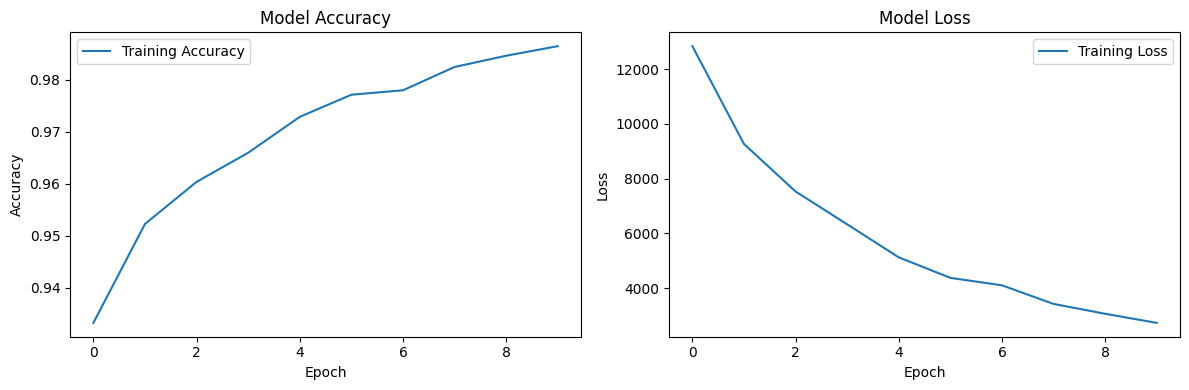

In [7]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

### Evaluating the Model

After training, we can evaluate the model on the test set:


In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9684


### Making Predictions

Let's make predictions for the first 5 test samples:


Predictions for the first 5 test samples:
[8 4 8 7 7]
Actual labels:
[8 4 8 7 7]


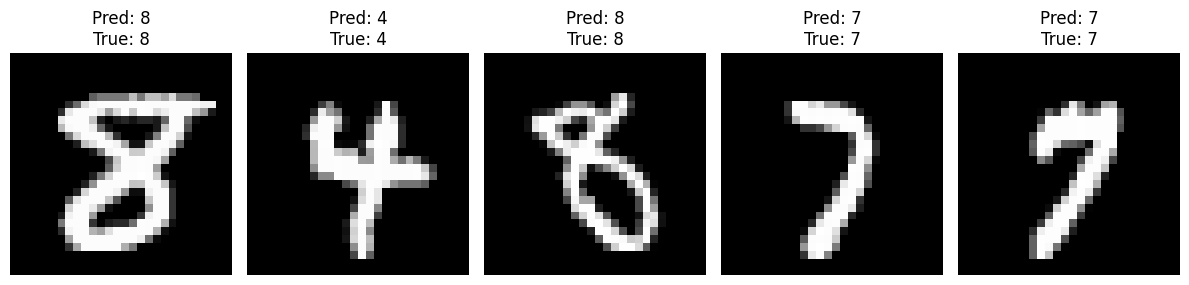

In [9]:
predictions = model.predict(X_test[:5])
print("Predictions for the first 5 test samples:")
print(np.argmax(predictions, axis=1))
print("Actual labels:")
print(np.argmax(y_test[:5], axis=1))

# Visualize the predictions
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Saving and Loading the Model

MicroKeras allows you to save and load models:


In [10]:
# Save the model
model.save('mnist_model.json')

# Load the model
loaded_model = Sequential.load('mnist_model.json')

# Compile the loaded model
loaded_model.compile(optimizer=optimizer,
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Evaluate the loaded model
loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Loaded model test accuracy: {loaded_test_accuracy:.4f}")

Loaded model test accuracy: 0.9684


### Viewing Training History

Finally, let's print out the training history:


In [11]:
print("\nTraining History:")
print("Epoch\tAccuracy\tLoss")
for epoch, (accuracy, loss) in enumerate(zip(history['accuracy'], history['loss']), 1):
    print(f"{epoch}\t{accuracy:.4f}\t{loss:.4f}")


Training History:
Epoch	Accuracy	Loss
1	0.9333	12837.3193
2	0.9523	9266.4003
3	0.9604	7531.2823
4	0.9660	6332.7681
5	0.9729	5126.9446
6	0.9771	4377.7893
7	0.9780	4106.2379
8	0.9825	3426.0480
9	0.9846	3067.2838
10	0.9865	2734.5617
